# House Prices: Advanced Regression Techniques

Competition web page: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

### Description

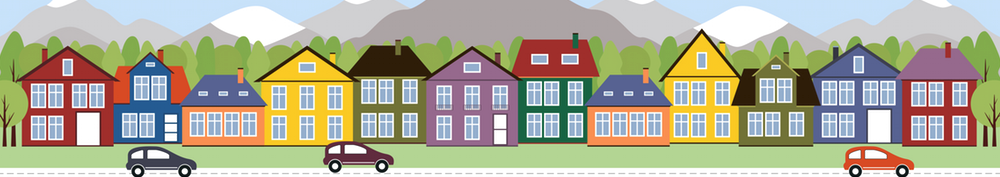

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Goal

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

### Fire up imports

Trick to install a package in docker container

In [2]:
import pip    
def install(package):
   pip.main(['install', package])

In [4]:
import csv
import operator
import os
import pandas
import re
import sklearn
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read some house data

In [6]:
data_dir = 'data'
#separator = '|'
#column_names = ['link', 'date', 'title', 'category', 'body']

In [8]:
train_file = os.path.join(data_dir, 'train.csv')
train_data = pandas.read_csv(train_file)

In [9]:
# check data size
len(train_data)

1460

In [10]:
# Let`s look at the data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
